# PyTro example
Let's build a problem from the ground up.  We start by importing numpy and setting up the dynamics matrices for the model $x(k+1) = Ax(k)+Bu(k)$.

In [1]:
import numpy as np
A = np.eye(2)
B = np.eye(2)

Initialize a problem instance with these simple dynamics and five time steps.  The trajectory should start in position (0,0) and go to (1,1).

In [2]:
import ltraj
p = ltraj.LTraj2DAvoid(A,B,Nt=5)
p.setInitialState([0,0])
p.setTerminalState([1,1])
print(p)

Trajectory:
MINIMIZE
0.0
SUBJECT TO
_C1: u1(0)_0 + x1(0)_0 - x1(1)_0 = 0

_C2: u1(0)_1 + x1(0)_1 - x1(1)_1 = 0

_C3: u1(1)_0 + x1(1)_0 - x1(2)_0 = 0

_C4: u1(1)_1 + x1(1)_1 - x1(2)_1 = 0

_C5: u1(2)_0 + x1(2)_0 - x1(3)_0 = 0

_C6: u1(2)_1 + x1(2)_1 - x1(3)_1 = 0

_C7: u1(3)_0 + x1(3)_0 - x1(4)_0 = 0

_C8: u1(3)_1 + x1(3)_1 - x1(4)_1 = 0

_C9: u1(4)_0 + x1(4)_0 - x1(5)_0 = 0

_C10: u1(4)_1 + x1(4)_1 - x1(5)_1 = 0

xinit_0: x1(0)_0 = 0

xinit_1: x1(0)_1 = 0

xterm_0: x1(5)_0 = 1

xterm_1: x1(5)_1 = 1

VARIABLES
u1(0)_0 free Continuous
u1(0)_1 free Continuous
u1(1)_0 free Continuous
u1(1)_1 free Continuous
u1(2)_0 free Continuous
u1(2)_1 free Continuous
u1(3)_0 free Continuous
u1(3)_1 free Continuous
u1(4)_0 free Continuous
u1(4)_1 free Continuous
x1(0)_0 free Continuous
x1(0)_1 free Continuous
x1(1)_0 free Continuous
x1(1)_1 free Continuous
x1(2)_0 free Continuous
x1(2)_1 free Continuous
x1(3)_0 free Continuous
x1(3)_1 free Continuous
x1(4)_0 free Continuous
x1(4)_1 free Continuous
x1(5)

The optimization doesn't do much yet: we have no cost function, but we can see the dynamics constraints and the boundary conditions.  Next to add a stage cost, $||u(k)||_2$, which will be totalled over each time step $k$.

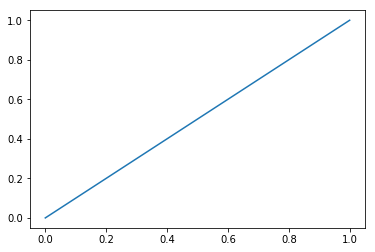

In [3]:
p.add2NormStageCost(np.zeros((2,2)),np.eye(2),Nc=6)
p.solve()
p.plotTraj2D()

Unsurprisingly, the solution is a straight line from start to finish.  Let's look at the formulation.

In [4]:
print(p)

Trajectory:
MINIMIZE
1*_max23 + 1*_max24 + 1*_max25 + 1*_max26 + 1*_max27 + 0.0
SUBJECT TO
_C1: u1(0)_0 + x1(0)_0 - x1(1)_0 = 0

_C2: u1(0)_1 + x1(0)_1 - x1(1)_1 = 0

_C3: u1(1)_0 + x1(1)_0 - x1(2)_0 = 0

_C4: u1(1)_1 + x1(1)_1 - x1(2)_1 = 0

_C5: u1(2)_0 + x1(2)_0 - x1(3)_0 = 0

_C6: u1(2)_1 + x1(2)_1 - x1(3)_1 = 0

_C7: u1(3)_0 + x1(3)_0 - x1(4)_0 = 0

_C8: u1(3)_1 + x1(3)_1 - x1(4)_1 = 0

_C9: u1(4)_0 + x1(4)_0 - x1(5)_0 = 0

_C10: u1(4)_1 + x1(4)_1 - x1(5)_1 = 0

xinit_0: x1(0)_0 = 0

xinit_1: x1(0)_1 = 0

xterm_0: x1(5)_0 = 1

xterm_1: x1(5)_1 = 1

_C11: - _max23 + u1(0)_0 <= 0

_C12: - _max23 + 0.866025403784 u1(0)_0 + 0.5 u1(0)_1 <= 0

_C13: - _max23 + 0.5 u1(0)_0 + 0.866025403784 u1(0)_1 <= 0

_C14: - _max23 + 6.12323399574e-17 u1(0)_0 + u1(0)_1 <= 0

_C15: - _max23 - 0.5 u1(0)_0 + 0.866025403784 u1(0)_1 <= 0

_C16: - _max23 - 0.866025403784 u1(0)_0 + 0.5 u1(0)_1 <= 0

_C17: - _max23 - u1(0)_0 <= 0

_C18: - _max23 - 0.866025403784 u1(0)_0 - 0.5 u1(0)_1 <= 0

_C19: - _max23 - 0.

Note that the two-norm, which cannot be exactly expressed in linear program form, has been approximated as $\|u\| \approx \max_i e_i^Tu$ where $e_i = (\cos \theta_i,\sin \theta_i)$ is a set of unit vectors pointing in different directions.

So far, so good.  Now, let's put an obstacle in the way.

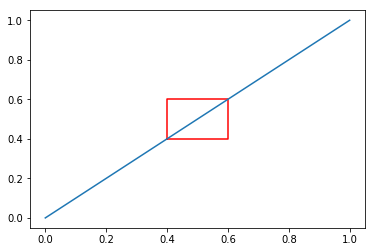

In [5]:
p.addStatic2DObst(0.4,0.6,0.4,0.6)
p.solve()
p.plotTraj2D()

In [6]:
print(p)

Trajectory:
MINIMIZE
1*_max23 + 1*_max24 + 1*_max25 + 1*_max26 + 1*_max27 + 0.0
SUBJECT TO
_C1: u1(0)_0 + x1(0)_0 - x1(1)_0 = 0

_C2: u1(0)_1 + x1(0)_1 - x1(1)_1 = 0

_C3: u1(1)_0 + x1(1)_0 - x1(2)_0 = 0

_C4: u1(1)_1 + x1(1)_1 - x1(2)_1 = 0

_C5: u1(2)_0 + x1(2)_0 - x1(3)_0 = 0

_C6: u1(2)_1 + x1(2)_1 - x1(3)_1 = 0

_C7: u1(3)_0 + x1(3)_0 - x1(4)_0 = 0

_C8: u1(3)_1 + x1(3)_1 - x1(4)_1 = 0

_C9: u1(4)_0 + x1(4)_0 - x1(5)_0 = 0

_C10: u1(4)_1 + x1(4)_1 - x1(5)_1 = 0

xinit_0: x1(0)_0 = 0

xinit_1: x1(0)_1 = 0

xterm_0: x1(5)_0 = 1

xterm_1: x1(5)_1 = 1

_C11: - _max23 + u1(0)_0 <= 0

_C12: - _max23 + 0.866025403784 u1(0)_0 + 0.5 u1(0)_1 <= 0

_C13: - _max23 + 0.5 u1(0)_0 + 0.866025403784 u1(0)_1 <= 0

_C14: - _max23 + 6.12323399574e-17 u1(0)_0 + u1(0)_1 <= 0

_C15: - _max23 - 0.5 u1(0)_0 + 0.866025403784 u1(0)_1 <= 0

_C16: - _max23 - 0.866025403784 u1(0)_0 + 0.5 u1(0)_1 <= 0

_C17: - _max23 - u1(0)_0 <= 0

_C18: - _max23 - 0.866025403784 u1(0)_0 - 0.5 u1(0)_1 <= 0

_C19: - _max23 - 0.

In [7]:
pm = p.convertToMILP(M=100)
print(pm)

Trajectory:
MINIMIZE
1*_max23 + 1*_max24 + 1*_max25 + 1*_max26 + 1*_max27 + 0.0
SUBJECT TO
_C1: u1(0)_0 + x1(0)_0 - x1(1)_0 = 0

_C2: u1(0)_1 + x1(0)_1 - x1(1)_1 = 0

_C3: u1(1)_0 + x1(1)_0 - x1(2)_0 = 0

_C4: u1(1)_1 + x1(1)_1 - x1(2)_1 = 0

_C5: u1(2)_0 + x1(2)_0 - x1(3)_0 = 0

_C6: u1(2)_1 + x1(2)_1 - x1(3)_1 = 0

_C7: u1(3)_0 + x1(3)_0 - x1(4)_0 = 0

_C8: u1(3)_1 + x1(3)_1 - x1(4)_1 = 0

_C9: u1(4)_0 + x1(4)_0 - x1(5)_0 = 0

_C10: u1(4)_1 + x1(4)_1 - x1(5)_1 = 0

xinit_0: x1(0)_0 = 0

xinit_1: x1(0)_1 = 0

xterm_0: x1(5)_0 = 1

xterm_1: x1(5)_1 = 1

_C11: - _max23 + u1(0)_0 <= 0

_C12: - _max23 + 0.866025403784 u1(0)_0 + 0.5 u1(0)_1 <= 0

_C13: - _max23 + 0.5 u1(0)_0 + 0.866025403784 u1(0)_1 <= 0

_C14: - _max23 + 6.12323399574e-17 u1(0)_0 + u1(0)_1 <= 0

_C15: - _max23 - 0.5 u1(0)_0 + 0.866025403784 u1(0)_1 <= 0

_C16: - _max23 - 0.866025403784 u1(0)_0 + 0.5 u1(0)_1 <= 0

_C17: - _max23 - u1(0)_0 <= 0

_C18: - _max23 - 0.866025403784 u1(0)_0 - 0.5 u1(0)_1 <= 0

_C19: - _max23 - 0.

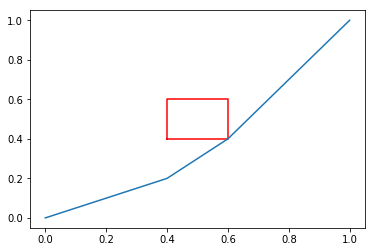

In [8]:
p.solveByMILP()
p.plotTraj2D()

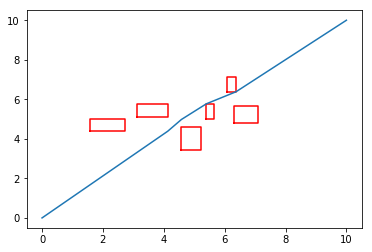

In [9]:
pr = ltraj.randomTest(num_boxes=6)